In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import mplhep as hep
hep.style.use(hep.style.ATLAS)

from performance.utils import clean_pandas_df

IN_DIR = "data/odd_traccc_old_4gpu/"
IN_FILE = "2insts_4gpus/gpu_2instance_sync.csv"
OUT_DIR = IN_DIR

data = pd.read_csv(IN_DIR + IN_FILE)
data = clean_pandas_df(data)
data

,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,...,gpu_memory_1_GB,gpu_memory_2_GB,gpu_memory_3_GB,gpu_total_memory_0_GB,gpu_total_memory_1_GB,gpu_total_memory_2_GB,gpu_total_memory_3_GB,total_gpu_usage,max_gpu_memory,percent_gpu_memory
0,1,2.83749,4,279,47,10,351971,91,1,342894,...,2.146435,2.146435,2.146435,85.899346,85.899346,85.899346,85.899346,48.0555,2.511340,2.923584
1,2,3.59998,6,297,44,9,554742,79,2,553147,...,2.511340,2.626683,2.746221,85.899346,85.899346,85.899346,85.899346,69.4166,2.746221,3.197021
4,3,3.69303,5,309,44,8,811458,71,2,809330,...,3.706716,3.109028,3.484418,85.899346,85.899346,85.899346,85.899346,72.5891,3.706716,4.315186
3,4,3.68748,5,353,50,8,1084654,73,1,1082197,...,3.501195,2.746221,2.746221,85.899346,85.899346,85.899346,85.899346,70.5278,3.501195,4.075928
6,5,3.72359,5,411,42,9,1340433,75,1,1334033,...,2.635071,2.746221,3.239051,85.899346,85.899346,85.899346,85.899346,73.9167,3.249537,3.782959
7,6,3.74025,5,453,34,8,1605337,77,1,1602971,...,3.746562,3.153068,3.473932,85.899346,85.899346,85.899346,85.899346,74.1112,3.746562,4.361572
5,7,3.69580,5,461,28,8,1889690,80,1,1883500,...,2.991587,3.111125,2.817524,85.899346,85.899346,85.899346,85.899346,73.9306,3.111125,3.621826
2,8,3.61109,5,465,20,6,2212051,86,1,2211324,...,3.138388,3.115319,3.138388,85.899346,85.899346,85.899346,85.899346,72.7083,3.717202,4.327393


## Plot throughput vs concurrent requets

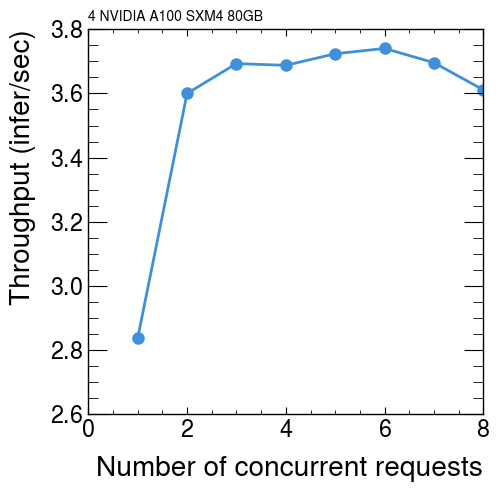

In [2]:
plt.figure(figsize=(5, 5))
plt.plot(data['Concurrency'].values, data['Inferences/Second'].values, 'o-', label='CPU')
plt.xlabel('Number of concurrent requests', loc='right')
plt.ylabel('Throughput (infer/sec)', loc='top')
plt.title('4 NVIDIA A100 SXM4 80GB', fontsize=10, loc='left')

plt.savefig(f'{OUT_DIR}/concurrency_vs_throughput_2inst.pdf', bbox_inches='tight')
plt.show()

## Plot GPU utilization per GPU

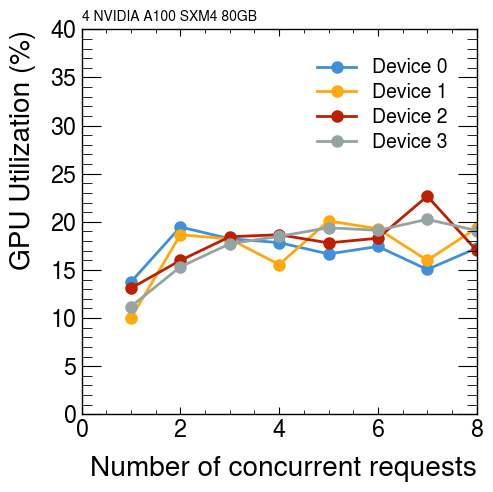

In [3]:
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.plot(data['Concurrency'].values, data[f'gpu_util_{i}'].values, 'o-', label=f'Device {i}')
plt.xlabel('Number of concurrent requests', loc='right')
plt.ylabel('GPU Utilization (%)', loc='top')
plt.title('4 NVIDIA A100 SXM4 80GB', fontsize=10, loc='left')
plt.legend()
plt.ylim(0, 40)

plt.savefig(f'{OUT_DIR}/concurrency_vs_gpu_util_2inst.pdf', bbox_inches='tight')
plt.show()